# api

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json

In [ ]:
api_key = 'W33QUO06NRO0R5BX374G'

In [ ]:
start = 1
end = 100000
statcode = '902Y021'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = 'KOR'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_unemployment_kr = df1[['TIME', 'DATA_VALUE']]
df_unemployment_kr.rename(columns={'DATA_VALUE':'umemplyoment_kr'},inplace=True)
df_unemployment_kr
df_unemployment_kr.to_csv('unemployment_kr.csv', index=False, encoding='utf-8-sig')

In [ ]:
start = 1
end = 100000
statcode = '902Y021'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = 'USA'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_unemployment_us = df1[['TIME', 'DATA_VALUE']]
df_unemployment_us.rename(columns={'DATA_VALUE':'umemplyoment_us'},inplace=True)
df_unemployment_us
df_unemployment_us.to_csv('unemployment_us.csv', index=False, encoding='utf-8-sig')

In [ ]:
df_unemployment = pd.merge(df_unemployment_kr, df_unemployment_us, on='TIME', how='inner')
df_unemployment.to_csv('unemployment.csv', index=False, encoding='utf-8-sig')
df_unemployment

TIME umemplyoment_kr umemplyoment_us
0    199001             2.6             5.4
1    199002             2.5             5.3
2    199003             2.2             5.2
3    199004             2.2             5.4
4    199005             2.4             5.4
..      ...             ...             ...
417  202410             2.7             4.1
418  202411             2.7             4.2
419  202412             3.7             4.1
420  202501             2.9               4
421  202502             2.7             4.1

[422 rows x 3 columns]

In [ ]:
import pandas as pd
from datetime import timedelta

# ÏòàÏãú: merged_dfÏùò TIMEÏù¥ 'YYYYMM' ÌòïÏãùÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
# Î®ºÏ†Ä TIMEÏùÑ ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
df_unemployment['TIME'] = pd.to_datetime(df_unemployment['TIME'], format='%Y%m')

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏùºÎ≥ÑÎ°ú ÌôïÏû•
daily_rows = []

for _, row in df_unemployment.iterrows():
    start_date = row['TIME']
    # Ìï¥Îãπ ÏõîÏùò ÎßàÏßÄÎßâ ÎÇ†Ïßú Íµ¨ÌïòÍ∏∞
    next_month = (start_date + pd.offsets.MonthBegin(1))
    end_date = next_month - timedelta(days=1)

    # ÏùºÎ≥Ñ ÎÇ†Ïßú ÏÉùÏÑ±
    date_range = pd.date_range(start=start_date, end=end_date)

    for date in date_range:
        new_row = row.copy()
        new_row['DATE'] = date
        daily_rows.append(new_row)

# ÏÉà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
unemployment_df = pd.DataFrame(daily_rows)

unemployment_df = unemployment_df.reset_index(drop=True)
unemployment_df.drop(columns=['TIME'],inplace=True)
# Í≤∞Í≥º ÌôïÏù∏
unemployment_df


unemployment_df.to_csv('daily_unrate.csv', index=False, encoding='utf-8-sig')

In [ ]:
start = 1
end = 100000
statcode = '901Y009'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = '0'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_cpi = df1[['TIME', 'DATA_VALUE']]
df_cpi.rename(columns={'DATA_VALUE':'CPI'},inplace=True)
df_cpi
#df_cpi.to_csv('CPI.csv', index=False, encoding='utf-8-sig')

<ipython-input-10-d45e26cf9178>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cpi.rename(columns={'DATA_VALUE':'CPI'},inplace=True)


TIME     CPI
0    196501   2.493
1    196502   2.548
2    196503   2.553
3    196504   2.593
4    196505   2.645
..      ...     ...
718  202411   114.4
719  202412  114.91
720  202501  115.71
721  202502  116.08
722  202503  116.29

[723 rows x 2 columns]

In [ ]:
start = 1
end = 100000
statcode = '404Y014'
cycle = 'M'
time1 = '196501'
time2 = '202512'
item_code  = '*AA'
url = f"http://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/{start}/{end}/{statcode}/{cycle}/{time1}/{time2}/{item_code}"
response = requests.get(url)
data = response.json()

df1 = pd.DataFrame(data['StatisticSearch']['row'])
df_ppi = df1[['TIME', 'DATA_VALUE']]
#df_ppi.rename(columns={'DATA_VALUE':'PPI'},inplace=True)
df_ppi
#df_ppi.to_csv('PPI.csv', index=False, encoding='utf-8-sig')




TIME DATA_VALUE
0    196501       4.88
1    196502       4.92
2    196503       4.88
3    196504       4.88
4    196505       4.98
..      ...        ...
717  202410     119.01
718  202411      119.1
719  202412     119.52
720  202501     120.27
721  202502     120.33

[722 rows x 2 columns]

In [ ]:
# API Ï†ïÎ≥¥
stat_code = "901Y009"
item_codes = {
    "A": "ÏãùÎ£åÌíà Î∞è ÎπÑÏ£ºÎ•òÏùåÎ£å",
    "B": "Ï£ºÎ•ò Î∞è Îã¥Î∞∞",
    "C": "Ïùò",
    "D": "Ï£º",
    "E": "Í∞ÄÏ†ïÏö©Ìíà"
}
start_date = "196501"
end_date = "202512"

# Ìï≠Î™©Î≥Ñ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÄÏû• Î¶¨Ïä§Ìä∏
dfs = []

for code, name in item_codes.items():
    url = f"https://ecos.bok.or.kr/api/StatisticSearch/{api_key}/json/kr/1/100000/{stat_code}/M/{start_date}/{end_date}/{code}"
    res = requests.get(url)
    data = res.json()

    if "StatisticSearch" in data and "row" in data["StatisticSearch"]:
        df = pd.DataFrame(data["StatisticSearch"]["row"])
        df = df[["TIME", "DATA_VALUE"]]
        df.rename(columns={"DATA_VALUE": name}, inplace=True)
        dfs.append(df)

# Îç∞Ïù¥ÌÑ∞ Î≥ëÌï©
df_merged = dfs[0]
for df in dfs[1:]:
    df_merged = pd.merge(df_merged, df, on="TIME", how="outer")

# ÏµúÏ¢Ö Í≤∞Í≥º Ï∂úÎ†•
print(df_merged)

       TIME ÏãùÎ£åÌíà Î∞è ÎπÑÏ£ºÎ•òÏùåÎ£å Ï£ºÎ•ò Î∞è Îã¥Î∞∞       Ïùò       Ï£º    Í∞ÄÏ†ïÏö©Ìíà
0    198501      20.259  22.027  32.802  30.604  43.519
1    198502      20.654  22.027  32.802  30.634  44.008
2    198503      20.487  22.027  32.834  30.697  44.272
3    198504      20.467  22.226  32.834  30.915  44.317
4    198505      20.737  22.315  32.834  31.133  44.361
..      ...         ...     ...     ...     ...     ...
478  202411      121.32  104.81  115.48  115.48  114.99
479  202412      123.61  104.58  115.49  115.67  115.84
480  202501      125.13  104.61  115.46  115.87  116.17
481  202502      126.45  104.69  115.86  116.47  116.61
482  202503      127.26  104.72  115.87  116.25  116.27

[483 rows x 6 columns]


In [ ]:
df_merged = pd.merge(df_cpi, df_ppi, on='TIME', how='inner')
df_merged.to_csv('merged.csv', index=False, encoding='utf-8-sig')
df_merged

TIME     CPI     PPI
0    196501   2.493    4.88
1    196502   2.548    4.92
2    196503   2.553    4.88
3    196504   2.593    4.88
4    196505   2.645    4.98
..      ...     ...     ...
717  202410  114.69  119.01
718  202411   114.4   119.1
719  202412  114.91  119.52
720  202501  115.71  120.27
721  202502  116.08  120.33

[722 rows x 3 columns]

In [ ]:
import pandas as pd
from datetime import timedelta

# ÏòàÏãú: merged_dfÏùò TIMEÏù¥ 'YYYYMM' ÌòïÏãùÏù¥ÎùºÍ≥† Í∞ÄÏ†ï
# Î®ºÏ†Ä TIMEÏùÑ ÎÇ†ÏßúÌòïÏúºÎ°ú Î≥ÄÌôò
df_merged['TIME'] = pd.to_datetime(df_merged['TIME'], format='%Y%m')

# ÏõîÎ≥Ñ Îç∞Ïù¥ÌÑ∞Î•º ÏùºÎ≥ÑÎ°ú ÌôïÏû•
daily_rows = []

for _, row in df_merged.iterrows():
    start_date = row['TIME']
    # Ìï¥Îãπ ÏõîÏùò ÎßàÏßÄÎßâ ÎÇ†Ïßú Íµ¨ÌïòÍ∏∞
    next_month = (start_date + pd.offsets.MonthBegin(1))
    end_date = next_month - timedelta(days=1)

    # ÏùºÎ≥Ñ ÎÇ†Ïßú ÏÉùÏÑ±
    date_range = pd.date_range(start=start_date, end=end_date)

    for date in date_range:
        new_row = row.copy()
        new_row['DATE'] = date
        daily_rows.append(new_row)

# ÏÉà Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
daily_df = pd.DataFrame(daily_rows)

daily_df = daily_df.reset_index(drop=True)
daily_df.drop(columns=['TIME'],inplace=True)
# Í≤∞Í≥º ÌôïÏù∏
daily_df


daily_df.to_csv('daily.csv', index=False, encoding='utf-8-sig')

In [ ]:
final = pd.read_csv('/content/new_1.csv')

In [ ]:
print(final.columns)

Index(['DATE', 'GDP(Ïã≠ÏñµÏõê)', 'GNI(Ïã≠ÏñµÏõê)', 'GDP_GROWTH(%)', 'KOSPI', 'Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)',
       'Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)', 'Îâ¥Ïä§Ïã¨Î¶¨ÏßÄÏàò', 'Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò', 'ÏàòÏ∂úÍ∏àÏï°ÏßÄÏàò', 'ÏàòÏûÖÍ∏àÏï°ÏßÄÏàò', 'ÏàòÏ∂úÎ¨ºÍ∞ÄÏßÄÏàò(ÏõêÌôîÍ∏∞Ï§Ä)',
       'ÏàòÏ∂úÎ¨ºÍ∞ÄÏßÄÏàò(Í≥ÑÏïΩÌÜµÌôîÍ∏∞Ï§Ä)', 'ÏàòÏ∂úÎ¨ºÍ∞ÄÏßÄÏàò(Îã¨Îü¨Í∏∞Ï§Ä)', 'ÏàòÏûÖÎ¨ºÍ∞ÄÏßÄÏàò(ÏõêÌôîÍ∏∞Ï§Ä)', 'ÏàòÏûÖÎ¨ºÍ∞ÄÏßÄÏàò(Í≥ÑÏïΩÌÜµÌôîÍ∏∞Ï§Ä)',
       'ÏàòÏûÖÎ¨ºÍ∞ÄÏßÄÏàò(Îã¨Îü¨Í∏∞Ï§Ä)', 'ÎåÄÏô∏Ï±ÑÍ∂å', 'ÎåÄÏô∏Ï±ÑÎ¨¥', 'ÏàúÎåÄÏô∏Ï±ÑÍ∂å', 'Ïô∏ÌôòÎ≥¥Ïú†Ïï°(Ï≤úÎã¨Îü¨)', 'Í∏∞Ï§ÄÍ∏àÎ¶¨',
       'CD(91Ïùº)', 'Î¨¥Îã¥Î≥¥ÏΩúÍ∏àÎ¶¨(1Ïùº, Ï†ÑÏ≤¥Í±∞Îûò)', 'Í≤ΩÏÉÅÏàòÏßÄ(Í≥ÑÏ†àÏ°∞Ï†ï)', 'CPI', 'PPI',
       'Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'ÏùºÎ≥∏Ïóî/Îã¨Îü¨', 'Îã¨Îü¨/Ïú†Î°ú', 'ÎØ∏Íµ≠Í∏∞Ï§ÄÍ∏àÎ¶¨'],
      dtype='object')


In [ ]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23845 entries, 0 to 23844
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              23845 non-null  object 
 1   GDP(Ïã≠ÏñµÏõê)          23845 non-null  float64
 2   GNI(Ïã≠ÏñµÏõê)          23845 non-null  float64
 3   GDP_GROWTH(%)     23754 non-null  float64
 4   KOSPI             11059 non-null  float64
 5   Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)        9649 non-null   float64
 6   Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)       8883 non-null   float64
 7   Îâ¥Ïä§Ïã¨Î¶¨ÏßÄÏàò            7408 non-null   float64
 8   Í≤ΩÏ†úÏã¨Î¶¨ÏßÄÏàò            8139 non-null   float64
 9   ÏàòÏ∂úÍ∏àÏï°ÏßÄÏàò            13618 non-null  float64
 10  ÏàòÏûÖÍ∏àÏï°ÏßÄÏàò            13618 non-null  float64
 11  ÏàòÏ∂úÎ¨ºÍ∞ÄÏßÄÏàò(ÏõêÌôîÍ∏∞Ï§Ä)      19827 non-null  float64
 12  ÏàòÏ∂úÎ¨ºÍ∞ÄÏßÄÏàò(Í≥ÑÏïΩÌÜµÌôîÍ∏∞Ï§Ä)    19827 non-null  float64
 13  ÏàòÏ∂úÎ¨ºÍ∞ÄÏßÄÏàò(Îã¨Îü¨Í∏∞Ï§Ä)      19827 non-null  float64

In [ ]:
final.loc[:, ['DATE','Í∏∞Ï§ÄÍ∏àÎ¶¨']]

DATE  Í∏∞Ï§ÄÍ∏àÎ¶¨
0      1960-01-01   NaN
1      1960-01-02   NaN
2      1960-01-03   NaN
3      1960-01-04   NaN
4      1960-01-05   NaN
...           ...   ...
23840  2025-04-09  2.75
23841  2025-04-10  2.75
23842  2025-04-11  2.75
23843  2025-04-12  2.75
23844  2025-04-13  2.75

[23845 rows x 2 columns]

# ÏãúÍ∞ÅÌôî Î∞è ÌÜµÍ≥ÑÍ≤ÄÏ†ï

In [ ]:
df = pd.read_csv('new_0418.csv', parse_dates=['DATE'])
df.set_index('DATE', inplace=True)


In [ ]:
# ÌïúÍ∏Ä Ïïà Íπ®ÏßÄÍ≤å
%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
# Ìè∞Ìä∏ÏÑ§Ï†ï
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] =False

In [ ]:
import matplotlib.font_manager as fm

# Assuming 'font_path.ttf' is the path to your NanumGothic font file
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)

## Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®

In [ ]:
df['term_spread'] = df['Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)'] - df['Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)']
df['term_spread_lag1'] = df['term_spread'].shift(1)

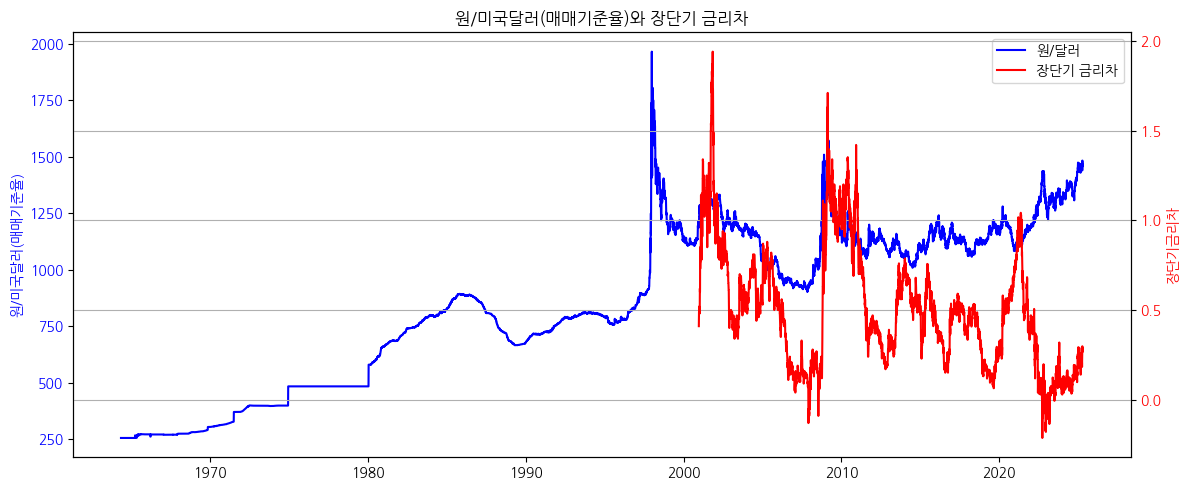

In [ ]:
plt.figure(figsize=(12, 5))

# Ï≤´ Î≤àÏß∏ yÏ∂ï
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], color='blue', label='Ïõê/Îã¨Îü¨')
ax1.set_ylabel('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Îëê Î≤àÏß∏ yÏ∂ï (Í≥µÏú† xÏ∂ï)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['term_spread'], color='red', label='Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®')
ax2.set_ylabel('Ïû•Îã®Í∏∞Í∏àÎ¶¨Ï∞®', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Î≤îÎ°ÄÎ•º ÏàòÎèôÏúºÎ°ú ÌÜµÌï©
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®')
plt.grid(True)
plt.tight_layout()
plt.show()


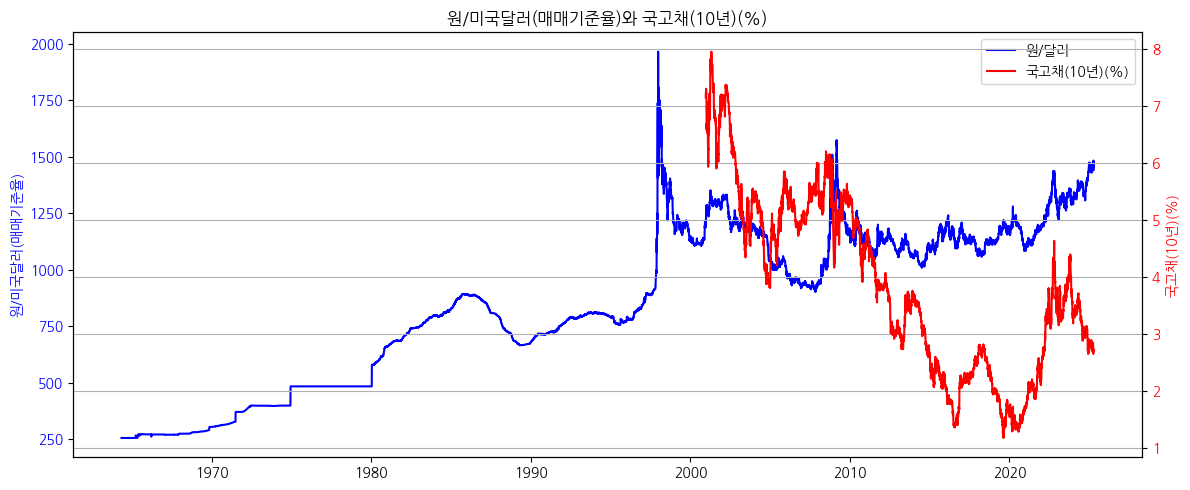

In [ ]:
plt.figure(figsize=(12, 5))

# Ï≤´ Î≤àÏß∏ yÏ∂ï
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], color='blue', label='Ïõê/Îã¨Îü¨')
ax1.set_ylabel('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Îëê Î≤àÏß∏ yÏ∂ï (Í≥µÏú† xÏ∂ï)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)'], color='red', label='Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)')
ax2.set_ylabel('Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Î≤îÎ°ÄÎ•º ÏàòÎèôÏúºÎ°ú ÌÜµÌï©
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)')
plt.grid(True)
plt.tight_layout()
plt.show()

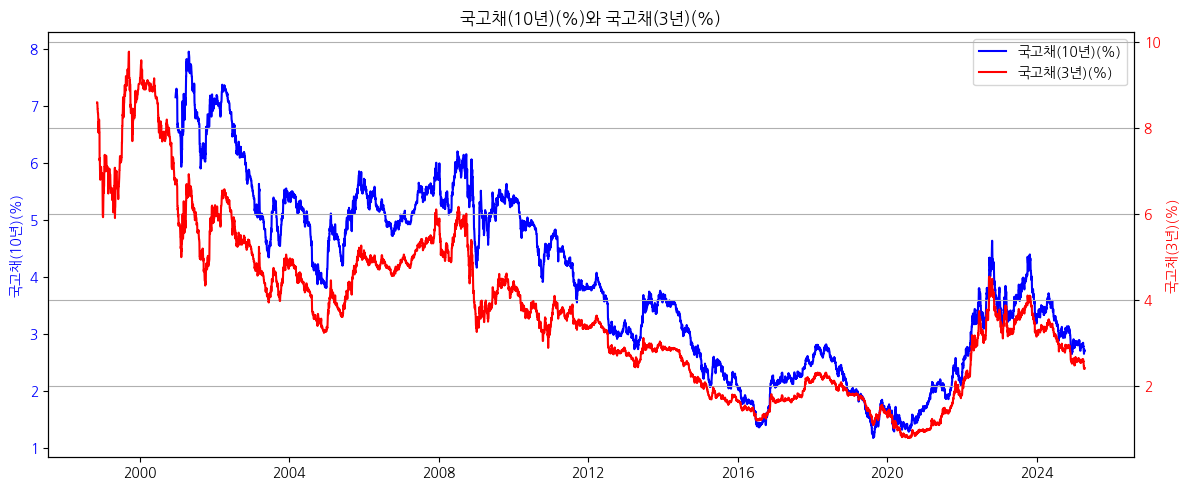

In [ ]:
plt.figure(figsize=(12, 5))

# Ï≤´ Î≤àÏß∏ yÏ∂ï
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)'], color='blue', label='Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)')
ax1.set_ylabel('Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Îëê Î≤àÏß∏ yÏ∂ï (Í≥µÏú† xÏ∂ï)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)'], color='red', label='Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)')
ax2.set_ylabel('Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Î≤îÎ°ÄÎ•º ÏàòÎèôÏúºÎ°ú ÌÜµÌï©
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title('Íµ≠Í≥†Ï±Ñ(10ÎÖÑ)(%)ÏôÄ Íµ≠Í≥†Ï±Ñ(3ÎÖÑ)(%)')
plt.grid(True)
plt.tight_layout()
plt.show()

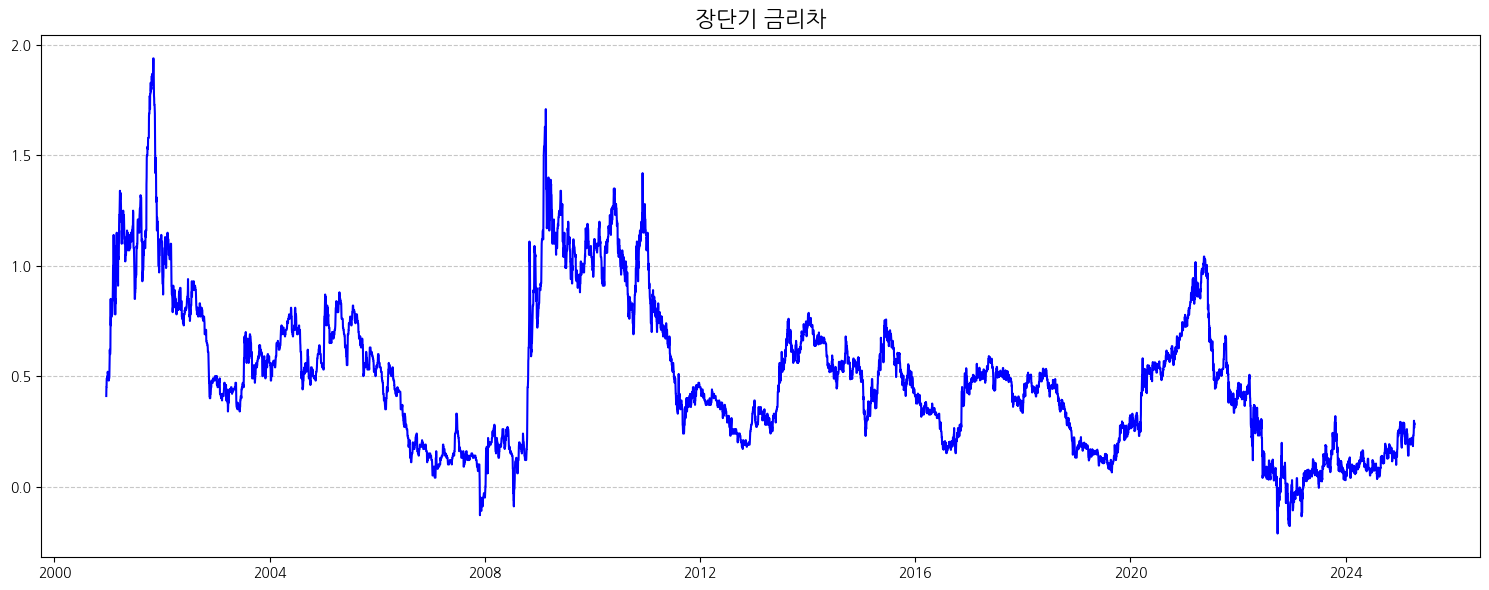

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(df.index, df['term_spread'], color='blue', label='Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®')
plt.title("Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

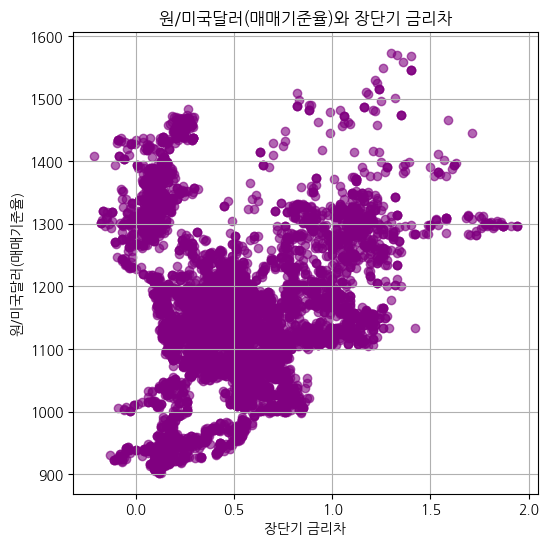

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df['term_spread'], df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], alpha=0.6, color='purple')
plt.xlabel("Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®")
plt.ylabel("Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)")
plt.title("Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®")
plt.grid(True)
plt.show()

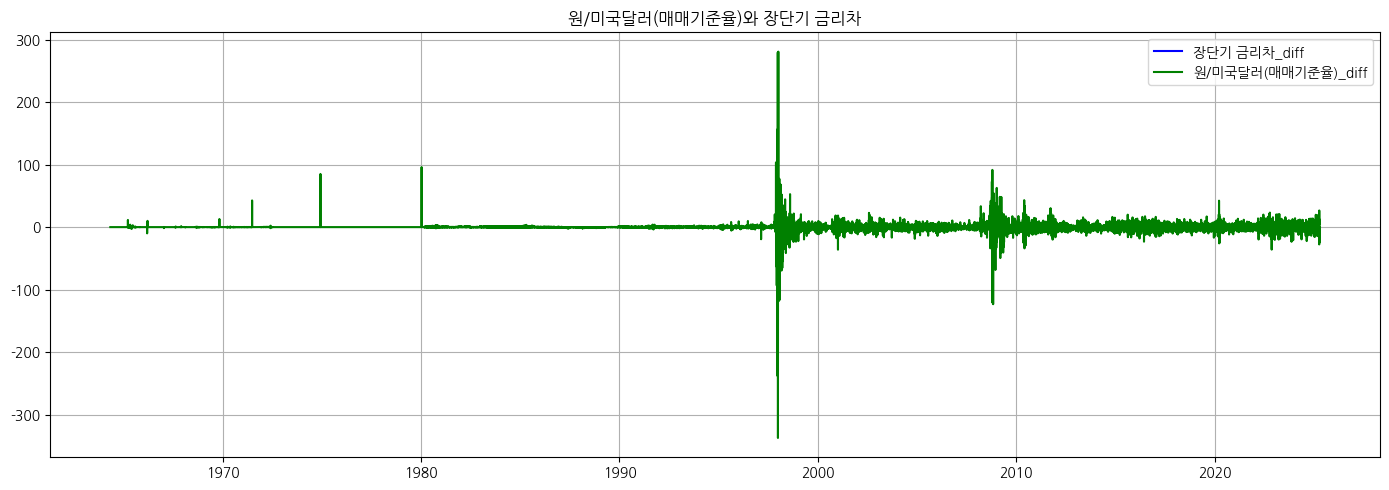

In [ ]:
df['term_spread_diff'] = df['term_spread'].diff()
df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)_diff'] = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'].diff()

plt.figure(figsize=(14,5))
# Reset the index to make 'DATE' a column again
df = df.reset_index()
plt.plot(df['DATE'], df['term_spread_diff'], label="Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®_diff", color='blue')
plt.plot(df['DATE'], df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)_diff'], label="Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)_diff", color='green')
plt.title("Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ Ïû•Îã®Í∏∞ Í∏àÎ¶¨Ï∞®")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
correlation = df[['term_spread', 'Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']].corr().iloc[0,1]
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")

ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.129


In [ ]:
correlation = df[['term_spread_lag1', 'Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']].corr().iloc[0,1]
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")

ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.128


In [ ]:
import statsmodels.api as sm

# fx_return ~ term_spread_lag1 ÌöåÍ∑Ä Î™®Îç∏
X = sm.add_constant(df['term_spread_lag1'])
y = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']

model = sm.OLS(y, X, missing='drop')
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           1.32e-33
Time:                        04:14:42   Log-Likelihood:                -55048.
No. Observations:                8882   AIC:                         1.101e+05
Df Residuals:                    8880   BIC:                         1.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             11

In [ ]:
# fx_return ~ term_spread_lag ÌöåÍ∑Ä Î™®Îç∏
X = sm.add_constant(df['term_spread'])
y = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']

model = sm.OLS(y, X, missing='drop')
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     149.7
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           3.85e-34
Time:                        04:14:45   Log-Likelihood:                -55053.
No. Observations:                8883   AIC:                         1.101e+05
Df Residuals:                    8881   BIC:                         1.101e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1133.7753      2.

In [ ]:
# Ï†ïÏÉÅÏÑ± ÌôïÏù∏

from statsmodels.tsa.stattools import adfuller

# Ïòà: ÌôòÏú®(fx)Í≥º Ïû•Îã®Í∏∞Í∏àÎ¶¨Ï∞®(term_spread)
for col in ['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'term_spread']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå')
    print()

üìå Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå

üìå term_spread ADF Test:
  Test Statistic: -3.0369784086156137
  p-value: 0.031582434390117244
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
#Ï∞®Î∂Ñ

df['fx_diff'] = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'].diff()
df['term_spread_diff'] = df['term_spread'].diff()

# Îã§Ïãú ADF ÌÖåÏä§Ìä∏
for col in ['fx_diff', 'term_spread_diff']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test (Ï∞®Î∂Ñ ÌõÑ):')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí ÏïÑÏßÅÎèÑ ÎπÑÏ†ïÏÉÅ')
    print()

üìå fx_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -18.419968514719862
  p-value: 2.177114433517963e-30
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå

üìå term_spread_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -28.82402928654234
  p-value: 0.0
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# 2Í∞ú Ïó¥Î°ú Íµ¨ÏÑ±Îêú DataFrame ÏÉùÏÑ±
# [Ï¢ÖÏÜçÎ≥ÄÏàò, ÏõêÏù∏ÏúºÎ°ú Í∞ÄÏ†ïÌïú Î≥ÄÏàò] ÏàúÏÑú
grangercausalitytests(df[['fx_diff', 'term_spread_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.7183  , p=0.0299  , df_denom=8878, df_num=1
ssr based chi2 test:   chi2=4.7199  , p=0.0298  , df=1
likelihood ratio test: chi2=4.7187  , p=0.0298  , df=1
parameter F test:         F=4.7183  , p=0.0299  , df_denom=8878, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7023  , p=0.0671  , df_denom=8875, df_num=2
ssr based chi2 test:   chi2=5.4076  , p=0.0669  , df=2
likelihood ratio test: chi2=5.4060  , p=0.0670  , df=2
parameter F test:         F=2.7023  , p=0.0671  , df_denom=8875, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.4890  , p=0.0585  , df_denom=8872, df_num=3
ssr based chi2 test:   chi2=7.4728  , p=0.0583  , df=3
likelihood ratio test: chi2=7.4697  , p=0.0583  , df=3
parameter F test:         F=2.4890  , p=0.0585  , df_denom=8872, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4508  , p=0.

{np.int64(1): ({'ssr_ftest': (np.float64(4.7183211808199275),
    np.float64(0.029869241363975476),
    np.float64(8878.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(4.7199155673419435),
    np.float64(0.029815207088640914),
    np.int64(1)),
   'lrtest': (np.float64(4.718661783241259),
    np.float64(0.02983695482443284),
    np.int64(1)),
   'params_ftest': (np.float64(4.71832118081179),
    np.float64(0.029869241364135674),
    np.float64(8878.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.7022922034060173),
    np.float64(0.06710681109285375),
    np.float64(8875.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(5.4076292430975625),
    np.float64(0.06694963748656031),
    np.int64(2)),
   'lrtest': (np.float64(5.405983376665972),
    np.float64(0.06700475524303916),
    np.int64(2)),
   'params_ftest': (np.float64(2.7022922034035526),
    np.float64(0.06710681109293554),
    np.float64(8875.0),
    2.0)},
   array([[0., 0., 1., 0., 

In [ ]:
from statsmodels.tsa.stattools import coint

# Í≤∞Ï∏° Ï†úÍ±∞
coint_data = df[['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'term_spread']].dropna()

# Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Ïã§Ìñâ
score, pvalue, _ = coint(coint_data['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], coint_data['term_spread'])

print(f"üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå" if pvalue < 0.05 else "  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå")

üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:
  Test Statistic: -1.508293008074215
  p-value: 0.7579983341917779
  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå


## Í≤ΩÏ†ú ÏÑ±Ïû•Î•†

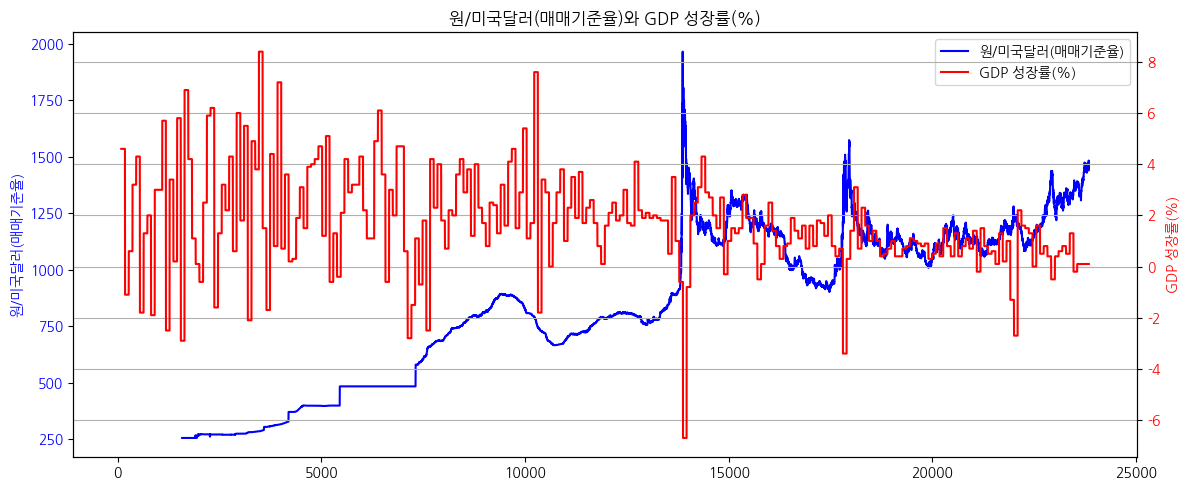

In [ ]:
plt.figure(figsize=(12, 5))

# Ï≤´ Î≤àÏß∏ yÏ∂ï
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], color='blue', label='Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)')
ax1.set_ylabel('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Îëê Î≤àÏß∏ yÏ∂ï (Í≥µÏú† xÏ∂ï)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['GDP_GROWTH(%)'], color='red', label='GDP ÏÑ±Ïû•Î•†(%)')
ax2.set_ylabel('GDP ÏÑ±Ïû•Î•†(%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Î≤îÎ°ÄÎ•º ÏàòÎèôÏúºÎ°ú ÌÜµÌï©
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='best')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ GDP ÏÑ±Ïû•Î•†(%)')
plt.grid(True)
plt.tight_layout()
plt.show()


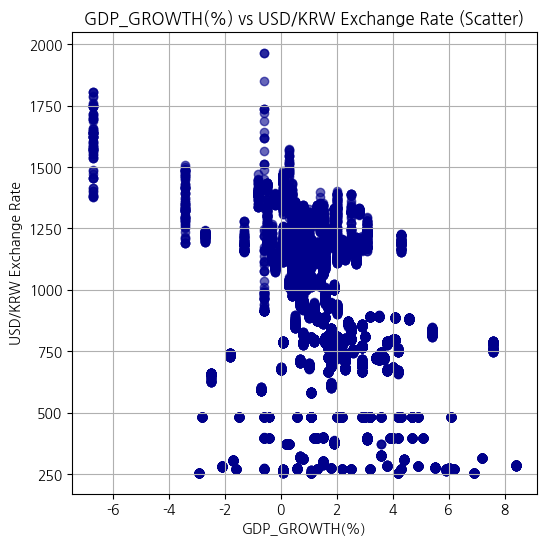

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["GDP_GROWTH(%)"], df["Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)"], alpha=0.6, color="darkblue")
plt.xlabel("GDP_GROWTH(%)")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("GDP_GROWTH(%) vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
correlation = df[['GDP_GROWTH(%)', 'Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']].corr().iloc[0,1]
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")

ÏÉÅÍ¥ÄÍ≥ÑÏàò: -0.390


In [ ]:
# Ï†ïÏÉÅÏÑ± ÌôïÏù∏

from statsmodels.tsa.stattools import adfuller

# Ïòà: ÌôòÏú®(fx)Í≥º Ïû•Îã®Í∏∞Í∏àÎ¶¨Ï∞®(term_spread)
for col in ['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'GDP_GROWTH(%)']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå')
    print()

üìå Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå

üìå GDP_GROWTH(%) ADF Test:
  Test Statistic: -10.923125521631697
  p-value: 1.0260134113865451e-19
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
grangercausalitytests(df[['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'GDP_GROWTH(%)']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.5903  , p=0.0181  , df_denom=22256, df_num=1
ssr based chi2 test:   chi2=5.5911  , p=0.0181  , df=1
likelihood ratio test: chi2=5.5904  , p=0.0181  , df=1
parameter F test:         F=5.5903  , p=0.0181  , df_denom=22256, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.4447  , p=0.0868  , df_denom=22253, df_num=2
ssr based chi2 test:   chi2=4.8906  , p=0.0867  , df=2
likelihood ratio test: chi2=4.8900  , p=0.0867  , df=2
parameter F test:         F=2.4447  , p=0.0868  , df_denom=22253, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=16.1606 , p=0.0000  , df_denom=22250, df_num=3
ssr based chi2 test:   chi2=48.4969 , p=0.0000  , df=3
likelihood ratio test: chi2=48.4442 , p=0.0000  , df=3
parameter F test:         F=16.1606 , p=0.0000  , df_denom=22250, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=13.7243 

{np.int64(1): ({'ssr_ftest': (np.float64(5.590306304426078),
    np.float64(0.018068672136081387),
    np.float64(22256.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(5.591059850387315),
    np.float64(0.018052370198477483),
    np.int64(1)),
   'lrtest': (np.float64(5.590357781184139),
    np.float64(0.018059607048309598),
    np.int64(1)),
   'params_ftest': (np.float64(5.590306304432095),
    np.float64(0.018068672135991677),
    np.float64(22256.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.4447332581480588),
    np.float64(0.08677257035163527),
    np.float64(22253.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(4.890565124689658),
    np.float64(0.08670163282354068),
    np.int64(2)),
   'lrtest': (np.float64(4.890027921792353),
    np.float64(0.08672492413561772),
    np.int64(2)),
   'params_ftest': (np.float64(2.444733258148935),
    np.float64(0.08677257035155951),
    np.float64(22253.0),
    2.0)},
   array([[0., 0., 1., 0.

In [ ]:
# Í≤∞Ï∏° Ï†úÍ±∞
coint_data = df[['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'GDP_GROWTH(%)']].dropna()

# Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Ïã§Ìñâ
score, pvalue, _ = coint(coint_data['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], coint_data['GDP_GROWTH(%)'])

print(f"üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå" if pvalue < 0.05 else "  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå")

üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:
  Test Statistic: -4.675082197919504
  p-value: 0.0006223447562479136
  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå


In [ ]:
from scipy.stats import ttest_ind

# ÌôòÏú® Í∏∞Ï§Ä ÏÉÅÏúÑ 50% vs ÌïòÏúÑ 50% Í∑∏Î£π
median_fx = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'].median()
high_fx = df[df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'] > median_fx]
low_fx = df[df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'] <= median_fx]

# T-Í≤ÄÏ†ï (ÎèÖÎ¶ΩÌëúÎ≥∏ t-test)
t_stat, p_val = ttest_ind(high_fx['GDP_GROWTH(%)'], low_fx['GDP_GROWTH(%)'], equal_var=False)

print(f"üìå T-ÌÜµÍ≥ÑÎüâ: {t_stat:.3f}")
print(f"üìä p-value: {p_val:.4f}")
if p_val < 0.05:
    print("‚úÖ ÌôòÏú® Í∑∏Î£π Í∞Ñ GDP ÏÑ±Ïû•Î•† Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® (p < 0.05)")
else:
    print("‚ö†Ô∏è Ïú†ÏùòÌïú Ï∞®Ïù¥ ÏóÜÏùå (p >= 0.05)")

üìå T-ÌÜµÍ≥ÑÎüâ: -55.216
üìä p-value: 0.0000
‚úÖ ÌôòÏú® Í∑∏Î£π Í∞Ñ GDP ÏÑ±Ïû•Î•† Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Ïú†ÏùòÌï® (p < 0.05)


In [ ]:
import statsmodels.api as sm
import pandas as pd

# ÎèÖÎ¶Ω Î≥ÄÏàò (ÌôòÏú®), Ï¢ÖÏÜç Î≥ÄÏàò (GDP ÏÑ±Ïû•Î•†)
X = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']
y = df['GDP_GROWTH(%)']

# Check for and handle missing or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both X and y have the same index after dropping missing values
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (intercept Ìè¨Ìï®)
X = sm.add_constant(X)

# ÌöåÍ∑ÄÎ™®Ìòï Ï†ÅÌï©
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º ÏöîÏïΩ
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          GDP_GROWTH(%)   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     3981.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:15:52   Log-Likelihood:                -43874.
No. Observations:               22260   AIC:                         8.775e+04
Df Residuals:                   22258   BIC:                         8.777e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.5136      0.031    113.100

## CPI

‚úÖ CPIÍ∞Ä ÌôòÏú®Ïóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î©îÏª§ÎãàÏ¶ò
1. Í∏àÎ¶¨ Ïù∏ÏÉÅ Í∞ÄÎä•ÏÑ± ‚Üí ÌÜµÌôî Í∞ïÏÑ∏
CPIÍ∞Ä ÎÜíÍ≤å ÎÇòÏò§Î©¥, Î¨ºÍ∞Ä ÏÉÅÏäπ(Ïù∏ÌîåÎ†àÏù¥ÏÖò)Ïù¥ Ïã¨Ìï¥Ï°åÎã§Îäî Ïã†Ìò∏.

ÎåÄÎ∂ÄÎ∂ÑÏùò Ï§ëÏïôÏùÄÌñâ(Ïòà: ÎØ∏Íµ≠Ïùò Ïó∞Ï§Ä, ÌïúÍµ≠ÏùÄÌñâ Îì±)ÏùÄ Î¨ºÍ∞Ä ÏïàÏ†ïÏù¥ Î™©ÌëúÏù¥ÎØÄÎ°ú, CPI ÏÉÅÏäπ Ïãú Í∏àÎ¶¨ Ïù∏ÏÉÅ Í∞ÄÎä•ÏÑ±Ïù¥ Ïª§Ïßê.

Í∏àÎ¶¨Í∞Ä Ïò§Î•¥Î©¥ Ìï¥Îãπ ÌÜµÌôî ÏûêÏÇ∞Ïùò ÏàòÏùµÎ•†Ïù¥ ÎÜíÏïÑÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê, Ïô∏Íµ≠ ÏûêÎ≥∏Ïù¥ Î™∞Î¶º ‚Üí Ìï¥Îãπ ÌÜµÌôî Í∞ïÏÑ∏ (ÌôòÏú® ÌïòÎùΩ).

Ïòà:

ÎØ∏Íµ≠ CPI ÏÉÅÏäπ ‚Üí Ïó∞Ï§ÄÏù¥ Í∏àÎ¶¨ Ïù∏ÏÉÅ ÏãúÏÇ¨ ‚Üí Îã¨Îü¨ Í∞ïÏÑ∏ ‚Üí Ïõê/Îã¨Îü¨ ÌôòÏú® ÌïòÎùΩ

2. CPIÍ∞Ä ÎÇÆÍ±∞ÎÇò ÌïòÎùΩ ‚Üí Í∏àÎ¶¨ Ïù∏Ìïò Í∞ÄÎä•ÏÑ± ‚Üí ÌÜµÌôî ÏïΩÏÑ∏
Î¨ºÍ∞Ä ÏÉÅÏäπÎ•†Ïù¥ ÎÇÆÎã§Îäî Í±¥ Í≤ΩÍ∏∞ ÎëîÌôî Ïã†Ìò∏Ïùº Ïàò ÏûàÏùå.

Í∏àÎ¶¨ Ïù∏Ìïò Í∏∞ÎåÄ ‚Üí ÏûêÍ∏à Ïú†Ï∂ú ‚Üí ÌÜµÌôî ÏïΩÏÑ∏ (ÌôòÏú® ÏÉÅÏäπ)

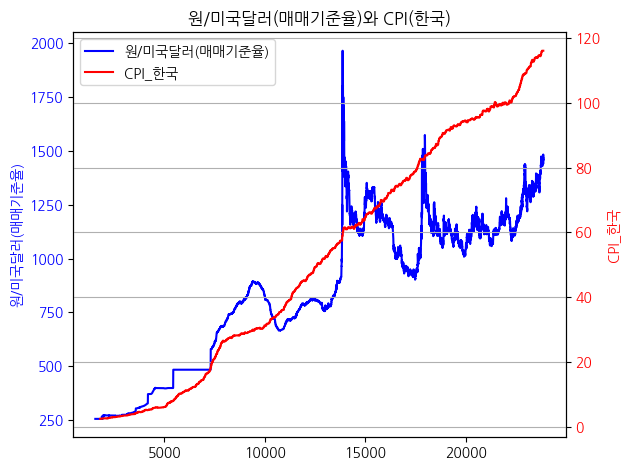

In [ ]:
# Ï≤´ Î≤àÏß∏ yÏ∂ï
ax1 = plt.gca()
line1, = ax1.plot(df.index, df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], color='blue', label='Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)')
ax1.set_ylabel('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Îëê Î≤àÏß∏ yÏ∂ï (Í≥µÏú† xÏ∂ï)
ax2 = ax1.twinx()
line2, = ax2.plot(df.index, df['CPI'], color='red', label='CPI_ÌïúÍµ≠')
ax2.set_ylabel('CPI_ÌïúÍµ≠', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Î≤îÎ°ÄÎ•º ÏàòÎèôÏúºÎ°ú ÌÜµÌï©
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ CPI(ÌïúÍµ≠)')
plt.grid(True)
plt.tight_layout()
plt.show()

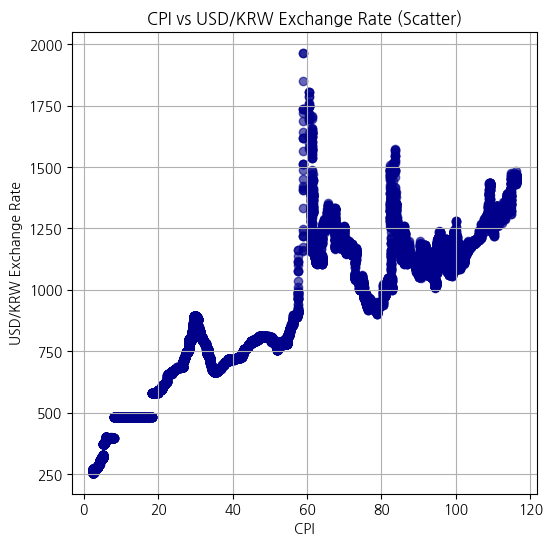

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df["CPI"], df["Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)"], alpha=0.6, color="darkblue")
plt.xlabel("CPI")
plt.ylabel("USD/KRW Exchange Rate")
plt.title("CPI vs USD/KRW Exchange Rate (Scatter)")
plt.grid(True)
plt.show()

In [ ]:
correlation = df[['CPI', 'Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']].corr().iloc[0,1]
print(f"ÏÉÅÍ¥ÄÍ≥ÑÏàò: {correlation:.3f}")

ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.908


In [ ]:
# Ï†ïÏÉÅÏÑ± ÌôïÏù∏

from statsmodels.tsa.stattools import adfuller

# Ïòà: ÌôòÏú®(fx)Í≥º Ïû•Îã®Í∏∞Í∏àÎ¶¨Ï∞®(term_spread)
for col in ['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'GDP_GROWTH(%)']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå')
    print()

üìå Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå

üìå GDP_GROWTH(%) ADF Test:
  Test Statistic: -10.923125521631697
  p-value: 1.0260134113865451e-19
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
#Ï∞®Î∂Ñ

df['fx_diff'] = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'].diff()
df['CPI_diff'] = df['CPI'].diff()

# Îã§Ïãú ADF ÌÖåÏä§Ìä∏
for col in ['fx_diff', 'term_spread_diff']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test (Ï∞®Î∂Ñ ÌõÑ):')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí ÏïÑÏßÅÎèÑ ÎπÑÏ†ïÏÉÅ')
    print()

üìå fx_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -18.419968514719862
  p-value: 2.177114433517963e-30
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå

üìå term_spread_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -28.82402928654234
  p-value: 0.0
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
grangercausalitytests(df[['fx_diff', 'CPI_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1276  , p=0.7210  , df_denom=22013, df_num=1
ssr based chi2 test:   chi2=0.1276  , p=0.7210  , df=1
likelihood ratio test: chi2=0.1276  , p=0.7210  , df=1
parameter F test:         F=0.1276  , p=0.7210  , df_denom=22013, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=48.9140 , p=0.0000  , df_denom=22010, df_num=2
ssr based chi2 test:   chi2=97.8502 , p=0.0000  , df=2
likelihood ratio test: chi2=97.6333 , p=0.0000  , df=2
parameter F test:         F=48.9140 , p=0.0000  , df_denom=22010, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=31.4632 , p=0.0000  , df_denom=22007, df_num=3
ssr based chi2 test:   chi2=94.4195 , p=0.0000  , df=3
likelihood ratio test: chi2=94.2176 , p=0.0000  , df=3
parameter F test:         F=31.4632 , p=0.0000  , df_denom=22007, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=25.0042 

{np.int64(1): ({'ssr_ftest': (np.float64(0.12755976817286377),
    np.float64(0.7209791179199179),
    np.float64(22013.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.12757715241419929),
    np.float64(0.7209574765441349),
    np.int64(1)),
   'lrtest': (np.float64(0.12757678277557716),
    np.float64(0.7209578638894294),
    np.int64(1)),
   'params_ftest': (np.float64(0.12755976814788952),
    np.float64(0.7209791179480908),
    np.float64(22013.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(48.91396940690387),
    np.float64(6.368001384167801e-22),
    np.float64(22010.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(97.85016233466503),
    np.float64(5.650764685329052e-22),
    np.int64(2)),
   'lrtest': (np.float64(97.63334703815053),
    np.float64(6.297788416669854e-22),
    np.int64(2)),
   'params_ftest': (np.float64(48.913969406913495),
    np.float64(6.368001384112509e-22),
    np.float64(22010.0),
    2.0)},
   array([[0., 0.

In [ ]:
# Í≤∞Ï∏° Ï†úÍ±∞
coint_data = df[['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'CPI']].dropna()

# Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Ïã§Ìñâ
score, pvalue, _ = coint(coint_data['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], coint_data['CPI'])

print(f"üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå" if pvalue < 0.05 else "  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå")

üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:
  Test Statistic: -4.037594806546159
  p-value: 0.006342793494731975
  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå


In [ ]:
import statsmodels.api as sm
import numpy as np

# ÎèÖÎ¶Ω Î≥ÄÏàò: CPI
X = df['CPI']

# Check for and handle missing or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both X and y have the same index after dropping missing values
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Add a constant (intercept) to the independent variable
X = sm.add_constant(X)

# Ï¢ÖÏÜç Î≥ÄÏàò: ÌôòÏú®
# y = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']  # Assuming y is already defined

# ÌöåÍ∑Ä Î∂ÑÏÑù
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          GDP_GROWTH(%)   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     4220.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:16:12   Log-Likelihood:                -42783.
No. Observations:               22018   AIC:                         8.557e+04
Df Residuals:                   22016   BIC:                         8.559e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7666      0.020    136.423      0.0

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 1Ï∞® Ï∞®Î∂Ñ
df['fx_diff'] = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'].diff()
df['term_spread_diff'] = df['term_spread_lag1'].diff()

# NaN ÏÉùÍ∏¥ Ï≤´ Ìñâ Ï†úÍ±∞
df_diff = df.dropna(subset=['fx_diff', 'term_spread_diff'])

# ÎèÖÎ¶ΩÎ≥ÄÏàòÏóê ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = sm.add_constant(df_diff['term_spread_diff'])
y = df_diff['fx_diff']

# ÌöåÍ∑Ä Î™®Îç∏ Ï†ÅÌï©
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º Ï∂úÎ†•
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                fx_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.463
Date:                Mon, 21 Apr 2025   Prob (F-statistic):              0.227
Time:                        04:16:20   Log-Likelihood:                -28469.
No. Observations:                8881   AIC:                         5.694e+04
Df Residuals:                    8879   BIC:                         5.696e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0284      0.063  

## Ïã§ÏóÖÎ•†

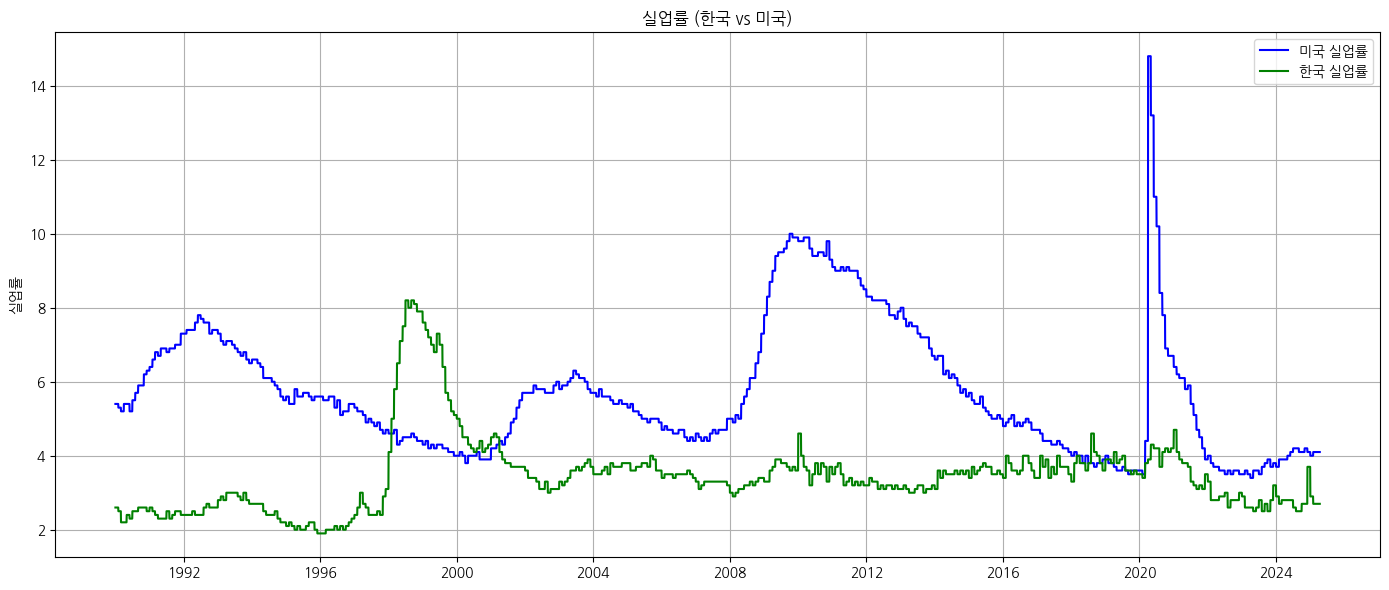

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 6))
plt.plot(df['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†'], label='ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', color='blue')
plt.plot(df['ÌïúÍµ≠Ïã§ÏóÖÎ•†'], label='ÌïúÍµ≠ Ïã§ÏóÖÎ•†', color='green')

# üìã Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.title('Ïã§ÏóÖÎ•† (ÌïúÍµ≠ vs ÎØ∏Íµ≠)')
plt.ylabel('Ïã§ÏóÖÎ•†')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


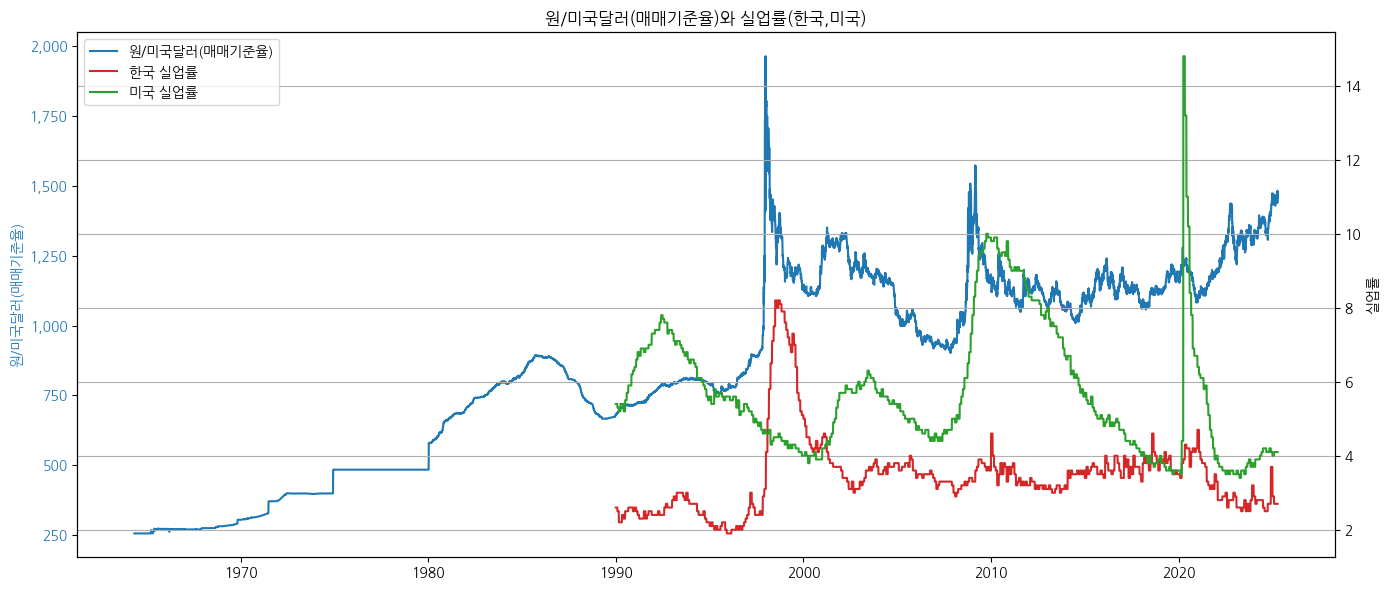

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

fig, ax1 = plt.subplots(figsize=(14, 6))

# ÏôºÏ™Ω yÏ∂ï - USD/KRW ÌôòÏú®
color1 = 'tab:blue'
ax1.set_ylabel('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', color=color1)
ax1.plot(df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], label='Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', color=color1)

# Ï≤ú Îã®ÏúÑÎ°ú ÏâºÌëú ÌëúÏãú
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

ax1.tick_params(axis='y', labelcolor=color1)
lines, labels = ax1.get_legend_handles_labels()

# Ïò§Î•∏Ï™Ω yÏ∂ï - ÌïúÍµ≠ Î∞è ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Ïã§ÏóÖÎ•†')
ax2.plot(df['ÌïúÍµ≠Ïã§ÏóÖÎ•†'], label='ÌïúÍµ≠ Ïã§ÏóÖÎ•†', color=color2)

color3 = 'tab:green'
ax2.plot(df['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†'], label='ÎØ∏Íµ≠ Ïã§ÏóÖÎ•†', color=color3)

ax2.tick_params(axis='y')
lines2, labels2 = ax2.get_legend_handles_labels()

# Î≤îÎ°Ä ÌÜµÌï©
lines += lines2
labels += labels2

# ÏµúÏ¢Ö Ï∂úÎ†•
plt.title('Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)ÏôÄ Ïã§ÏóÖÎ•†(ÌïúÍµ≠,ÎØ∏Íµ≠)')
plt.legend(lines, labels, loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

df_corr = df[['ÌïúÍµ≠Ïã§ÏóÖÎ•†', 'ÎØ∏Íµ≠Ïã§ÏóÖÎ•†', 'Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']].dropna()

# 2. ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞ (ÌîºÏñ¥Ïä® Î∞©Ïãù)
corr_matrix = df_corr.corr(method='pearson')

print("üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨:")
print(corr_matrix)

üìä ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨:
                  ÌïúÍµ≠Ïã§ÏóÖÎ•†     ÎØ∏Íµ≠Ïã§ÏóÖÎ•†  Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)
ÌïúÍµ≠Ïã§ÏóÖÎ•†          1.000000 -0.137755       0.480133
ÎØ∏Íµ≠Ïã§ÏóÖÎ•†         -0.137755  1.000000      -0.165206
Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)  0.480133 -0.165206       1.000000


In [ ]:
# Ï†ïÏÉÅÏÑ± ÌôïÏù∏

from statsmodels.tsa.stattools import adfuller

# Ïòà: ÌôòÏú®(fx)Í≥º Ïû•Îã®Í∏∞Í∏àÎ¶¨Ï∞®(term_spread)
for col in ['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'ÌïúÍµ≠Ïã§ÏóÖÎ•†','ÎØ∏Íµ≠Ïã§ÏóÖÎ•†']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test:')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå')
    print()

üìå Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®) ADF Test:
  Test Statistic: -1.6272496759729964
  p-value: 0.46893066779098774
  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå

üìå ÌïúÍµ≠Ïã§ÏóÖÎ•† ADF Test:
  Test Statistic: -2.2837297448238862
  p-value: 0.1772691574112394
  ‚Üí Ï†ïÏÉÅÏÑ± ÏóÜÏùå

üìå ÎØ∏Íµ≠Ïã§ÏóÖÎ•† ADF Test:
  Test Statistic: -3.331761570925637
  p-value: 0.013517067872314494
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
#Ï∞®Î∂Ñ

df['fx_diff'] = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'].diff()
df['ÌïúÍµ≠Ïã§ÏóÖÎ•†_diff'] = df['ÌïúÍµ≠Ïã§ÏóÖÎ•†'].diff()
df['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†_diff'] = df['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†'].diff()

# Îã§Ïãú ADF ÌÖåÏä§Ìä∏
for col in ['fx_diff', 'ÌïúÍµ≠Ïã§ÏóÖÎ•†_diff', 'ÎØ∏Íµ≠Ïã§ÏóÖÎ•†_diff']:
    result = adfuller(df[col].dropna())
    print(f'üìå {col} ADF Test (Ï∞®Î∂Ñ ÌõÑ):')
    print(f'  Test Statistic: {result[0]}')
    print(f'  p-value: {result[1]}')
    print('  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå' if result[1] < 0.05 else '  ‚Üí ÏïÑÏßÅÎèÑ ÎπÑÏ†ïÏÉÅ')
    print()

üìå fx_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -18.419968514719862
  p-value: 2.177114433517963e-30
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå

üìå ÌïúÍµ≠Ïã§ÏóÖÎ•†_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -20.285511906013173
  p-value: 0.0
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå

üìå ÎØ∏Íµ≠Ïã§ÏóÖÎ•†_diff ADF Test (Ï∞®Î∂Ñ ÌõÑ):
  Test Statistic: -19.84093406210117
  p-value: 0.0
  ‚Üí Ï†ïÏÉÅÏÑ± ÏûàÏùå



In [ ]:
grangercausalitytests(df[['fx_diff', 'ÌïúÍµ≠Ïã§ÏóÖÎ•†_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.9725  , p=0.1602  , df_denom=12882, df_num=1
ssr based chi2 test:   chi2=1.9729  , p=0.1601  , df=1
likelihood ratio test: chi2=1.9728  , p=0.1602  , df=1
parameter F test:         F=1.9725  , p=0.1602  , df_denom=12882, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=24.5123 , p=0.0000  , df_denom=12879, df_num=2
ssr based chi2 test:   chi2=49.0435 , p=0.0000  , df=2
likelihood ratio test: chi2=48.9504 , p=0.0000  , df=2
parameter F test:         F=24.5123 , p=0.0000  , df_denom=12879, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=15.5950 , p=0.0000  , df_denom=12876, df_num=3
ssr based chi2 test:   chi2=46.8103 , p=0.0000  , df=3
likelihood ratio test: chi2=46.7255 , p=0.0000  , df=3
parameter F test:         F=15.5950 , p=0.0000  , df_denom=12876, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=11.9249 

{np.int64(1): ({'ssr_ftest': (np.float64(1.9724674680361671),
    np.float64(0.16021030742953019),
    np.float64(12882.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(1.9729268223603489),
    np.float64(0.16013753869904973),
    np.int64(1)),
   'lrtest': (np.float64(1.9727757923828904),
    np.float64(0.16015353526749174),
    np.int64(1)),
   'params_ftest': (np.float64(1.9724674680418102),
    np.float64(0.16021030742902662),
    np.float64(12882.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(24.512257460676416),
    np.float64(2.369583101269364e-11),
    np.float64(12879.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(49.04354765484199),
    np.float64(2.240417417295693e-11),
    np.int64(2)),
   'lrtest': (np.float64(48.95044058049098),
    np.float64(2.347182640835918e-11),
    np.int64(2)),
   'params_ftest': (np.float64(24.512257460678473),
    np.float64(2.3695831012640858e-11),
    np.float64(12879.0),
    2.0)},
   array([[0., 

In [ ]:
grangercausalitytests(df[['fx_diff', 'ÎØ∏Íµ≠Ïã§ÏóÖÎ•†_diff']].dropna(), maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2520  , p=0.6157  , df_denom=12882, df_num=1
ssr based chi2 test:   chi2=0.2521  , p=0.6156  , df=1
likelihood ratio test: chi2=0.2520  , p=0.6156  , df=1
parameter F test:         F=0.2520  , p=0.6157  , df_denom=12882, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9584  , p=0.3835  , df_denom=12879, df_num=2
ssr based chi2 test:   chi2=1.9176  , p=0.3833  , df=2
likelihood ratio test: chi2=1.9175  , p=0.3834  , df=2
parameter F test:         F=0.9584  , p=0.3835  , df_denom=12879, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7496  , p=0.5224  , df_denom=12876, df_num=3
ssr based chi2 test:   chi2=2.2501  , p=0.5222  , df=3
likelihood ratio test: chi2=2.2499  , p=0.5222  , df=3
parameter F test:         F=0.7496  , p=0.5224  , df_denom=12876, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6398  

{np.int64(1): ({'ssr_ftest': (np.float64(0.2519923759143935),
    np.float64(0.6156842448060365),
    np.float64(12882.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.25205106067823013),
    np.float64(0.6156345511137011),
    np.int64(1)),
   'lrtest': (np.float64(0.25204859545920044),
    np.float64(0.6156362781061946),
    np.int64(1)),
   'params_ftest': (np.float64(0.2519923759253102),
    np.float64(0.6156842447980198),
    np.float64(12882.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.9584425578534896),
    np.float64(0.3835170352900633),
    np.float64(12879.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(1.9176293059064153),
    np.float64(0.38334701602442395),
    np.int64(2)),
   'lrtest': (np.float64(1.9174866119865328),
    np.float64(0.38337436764433575),
    np.int64(2)),
   'params_ftest': (np.float64(0.9584425578582116),
    np.float64(0.38351703528841774),
    np.float64(12879.0),
    2.0)},
   array([[0., 0., 1., 0.

In [ ]:
# Í≤∞Ï∏° Ï†úÍ±∞
coint_data = df[['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'ÌïúÍµ≠Ïã§ÏóÖÎ•†']].dropna()

# Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Ïã§Ìñâ
score, pvalue, _ = coint(coint_data['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], coint_data['ÌïúÍµ≠Ïã§ÏóÖÎ•†'])

print(f"üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå" if pvalue < 0.05 else "  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå")

üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:
  Test Statistic: -2.632020742509547
  p-value: 0.22497408795290247
  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå


In [ ]:
# Í≤∞Ï∏° Ï†úÍ±∞
coint_data = df[['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)', 'ÎØ∏Íµ≠Ïã§ÏóÖÎ•†']].dropna()

# Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Ïã§Ìñâ
score, pvalue, _ = coint(coint_data['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)'], coint_data['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†'])

print(f"üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:")
print(f"  Test Statistic: {score}")
print(f"  p-value: {pvalue}")
print("  ‚úÖ Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏûàÏùå" if pvalue < 0.05 else "  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå")

üìä Í≥µÏ†ÅÎ∂Ñ Í≤ÄÏ†ï Í≤∞Í≥º:
  Test Statistic: -2.6713713357909032
  p-value: 0.21004375175174406
  ‚ùå Í≥µÏ†ÅÎ∂Ñ Í¥ÄÍ≥Ñ ÏóÜÏùå


In [ ]:
import statsmodels.api as sm
import numpy as np

# ÎèÖÎ¶Ω Î≥ÄÏàò (ÎØ∏Íµ≠/ÌïúÍµ≠ Ïã§ÏóÖÎ•†), Ï¢ÖÏÜç Î≥ÄÏàò (USD/KRW)
X = df[['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠Ïã§ÏóÖÎ•†']]
y = df['Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)']

# Check for and handle missing or infinite values in X and y
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both X and y have the same index after dropping missing values
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]


# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (Ï†àÌé∏Ïö©)
X = sm.add_constant(X)

# ÌöåÍ∑ÄÎ™®Ìòï Ï†ÅÌï©
model = sm.OLS(y, X).fit()

# Í≤∞Í≥º ÏöîÏïΩ Ï∂úÎ†•
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Ïõê/ÎØ∏Íµ≠Îã¨Îü¨(Îß§Îß§Í∏∞Ï§ÄÏú®)   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     2040.
Date:                Mon, 21 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:16:39   Log-Likelihood:                -84537.
No. Observations:               12887   AIC:                         1.691e+05
Df Residuals:                   12884   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        846.3563      7.656

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ‚úÖ ÎèÖÎ¶Ω Î≥ÄÏàòÎßå Ï∂îÏ∂ú + ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä
X = df[['ÎØ∏Íµ≠Ïã§ÏóÖÎ•†', 'ÌïúÍµ≠Ïã§ÏóÖÎ•†']]
X = add_constant(X)

# ‚úÖ Replace infinite and missing values with finite values
X = X.replace([np.inf, -np.inf], np.nan).fillna(0) # or any other appropriate value

# ‚úÖ VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Î≥ÄÏàò"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

      Î≥ÄÏàò       VIF
0  const  2.081392
1  ÎØ∏Íµ≠Ïã§ÏóÖÎ•†  2.880744
2  ÌïúÍµ≠Ïã§ÏóÖÎ•†  2.880744
